In [14]:
import pandas as pd

In [15]:
data = pd.read_csv('sms_spam.csv')

In [16]:
data.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [17]:
data.shape

(5559, 2)

In [18]:
data.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4812   4503                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [19]:
data['length'] = data['text'].apply(len)

In [20]:
data.head()

,type,text,length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,spam,okmail: Dear Dave this is your final notice to...,161


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f05d9463a10>,
      dtype=object)

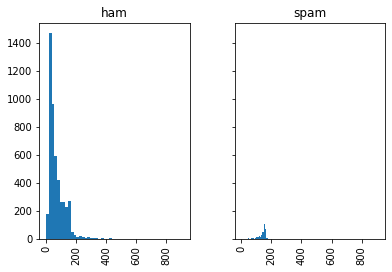

In [21]:
import matplotlib.pyplot as plt
data.hist(column='length',bins=50, by='type', sharex=True, sharey=True)

In [22]:
data.length.describe()

count    5559.000000
mean       79.781436
std        59.105497
min         2.000000
25%        35.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [23]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def clean_text(text):
    no_punc = [s for s in text if s not in string.punctuation]
    no_punc = ''.join(no_punc)
    rm_words = [w for w in no_punc.split() if w.lower() not in stop_words]
    return ' '.join(rm_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
clean_text('hello john!-;/.,<>? how are you.. @#$%^&*I am fine:')

'hello john fine'

In [26]:
data.head()

,type,text,length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,spam,okmail: Dear Dave this is your final notice to...,161


In [27]:
data.text = data.text.apply(clean_text)

In [28]:
data.head()

,type,text,length
0,ham,Hope good week checking,49
1,ham,Kgive back thanks,23
2,ham,also cbe pay,43
3,spam,complimentary 4 STAR Ibiza Holiday £10000 cash...,149
4,spam,okmail Dear Dave final notice collect 4 Teneri...,161


In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
bag_of_words = CountVectorizer()
bag_of_words.fit(data['text'])
bag_of_words.vocabulary_

{'hope': 4185,
 'good': 3798,
 'week': 8946,
 'checking': 2123,
 'kgive': 4724,
 'back': 1458,
 'thanks': 8188,
 'also': 1158,
 'cbe': 2050,
 'pay': 6199,
 'complimentary': 2335,
 'star': 7759,
 'ibiza': 4304,
 'holiday': 4155,
 '10000': 293,
 'cash': 2028,
 'needs': 5704,
 'urgent': 8669,
 'collection': 2285,
 '09066364349': 260,
 'landline': 4845,
 'lose': 5084,
 'box434sk38wp150ppm18': 1771,
 'okmail': 5967,
 'dear': 2649,
 'dave': 2621,
 'final': 3403,
 'notice': 5842,
 'collect': 2282,
 'tenerife': 8149,
 '5000': 688,
 'award': 1426,
 'call': 1934,
 '09061743806': 222,
 'tcs': 8103,
 'sae': 7088,
 'box326': 1763,
 'cw25wx': 2564,
 '150ppm': 374,
 'aiya': 1107,
 'discuss': 2836,
 'later': 4873,
 'lar': 4858,
 'pick': 6294,
 'much': 5593,
 'buzy': 1909,
 'please': 6353,
 'ask': 1341,
 'mummy': 5608,
 'father': 3333,
 'marvel': 5267,
 'mobile': 5486,
 'play': 6342,
 'official': 5943,
 'ultimate': 8579,
 'spiderman': 7681,
 'game': 3657,
 '450': 640,
 'ur': 8666,
 'right': 6978,
 'tex

In [30]:
len(bag_of_words.vocabulary_)

9385

In [31]:
txt_transform = bag_of_words.transform(data.text)
print(txt_transform.shape)

(5559, 9385)


In [32]:
print(txt_transform)

  (0, 2123)	1
  (0, 3798)	1
  (0, 4185)	1
  (0, 8946)	1
  (1, 1458)	1
  (1, 4724)	1
  (1, 8188)	1
  (2, 1158)	1
  (2, 2050)	1
  (2, 6199)	1
  (3, 260)	1
  (3, 293)	1
  (3, 1771)	1
  (3, 2028)	1
  (3, 2285)	1
  (3, 2335)	1
  (3, 4155)	1
  (3, 4304)	1
  (3, 4845)	1
  (3, 5084)	1
  (3, 5704)	1
  (3, 7759)	1
  (3, 8669)	1
  (4, 222)	1
  (4, 374)	1
  :	:
  (5556, 8100)	1
  (5556, 8829)	1
  (5556, 9227)	1
  (5557, 493)	1
  (5557, 494)	1
  (5557, 965)	1
  (5557, 1215)	1
  (5557, 3108)	2
  (5557, 3117)	1
  (5557, 4103)	1
  (5557, 4643)	2
  (5557, 4782)	1
  (5557, 4898)	1
  (5557, 5301)	1
  (5557, 6631)	1
  (5557, 6899)	2
  (5557, 7469)	1
  (5557, 7539)	1
  (5557, 7865)	1
  (5557, 8666)	1
  (5557, 9158)	1
  (5558, 1934)	1
  (5558, 2649)	1
  (5558, 3497)	1
  (5558, 7310)	1


In [33]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()

In [34]:
mn.fit(txt_transform,data.type)

MultinomialNB()

In [35]:
mn.score(txt_transform,data.type)

0.9928044612340349

In [36]:
import pickle
with open('mn.pkl', 'wb') as fl:
    pickle.dump(mn, fl)

In [37]:
with open('mn.pkl', 'rb') as fl:
    saved = pickle.load(fl)

In [38]:
import random
ind = random.randint(0,len(data))
new_sms = data.iloc[ind][1]

In [39]:
new_sms

'consider walls bunkers important never play peaceful guess place high enough dont matter'

In [40]:
def ham_spam(text):
    test = bag_of_words.transform([clean_text(text)])
    print(saved.predict_proba(test))
    print(saved.predict(test))
    

In [41]:
ham_spam(new_sms)

[[9.99936154e-01 6.38462517e-05]]
['ham']
